In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [2]:
anime_clean=pd.read_csv('anime_clean.csv')
anime_clean

,anime_id,name,genre,type,episodes,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16
...,...,...,...,...,...,...
10728,11095,Zouressha ga Yatte Kita,Adventure,Movie,1,6.06
10729,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47
10730,28543,Zukkoke Sannin-gumi no Hi Asobi Boushi Daisakusen,"Drama, Kids",OVA,1,5.83
10731,18967,Zukkoke Sannin-gumi: Zukkoke Jikuu Bouken,"Comedy, Historical, Sci-Fi",OVA,1,6.13


In [3]:
# Filter out rows with only one genre
single_genre_anime_clean = anime_clean[~anime_clean['genre'].str.contains(',', na=False)]

# Split the single genre from each row
single_genre_anime_clean_index = ~anime_clean['genre'].str.contains(',', na=False)
single_genre_anime_clean = anime_clean.loc[single_genre_anime_clean_index]

# Calculate the mean rating for each genre
mean_rating_by_genre = single_genre_anime_clean.groupby('genre')['rating'].mean()

print(mean_rating_by_genre)

genre
Action           5.815472
Adventure        6.255949
Cars             5.562000
Comedy           5.852380
Dementia         4.598467
Demons           4.145000
Drama            6.178558
Ecchi            6.218095
Fantasy          5.987636
Game             6.056364
Harem            5.935000
Historical       6.195882
Horror           5.283500
Kids             5.657157
Magic            5.871500
Martial Arts     7.550000
Mecha            5.545556
Military         4.505000
Music            5.756532
Mystery          6.540556
Parody           6.360000
Psychological    5.077692
Romance          6.006000
Samurai          4.885000
School           6.228571
Sci-Fi           6.075366
Seinen           5.986667
Shoujo           5.851111
Shounen          6.487778
Slice of Life    5.746061
Space            4.830000
Sports           6.006905
Supernatural     5.563571
Thriller         6.510000
Vampire          4.240000
Name: rating, dtype: float64


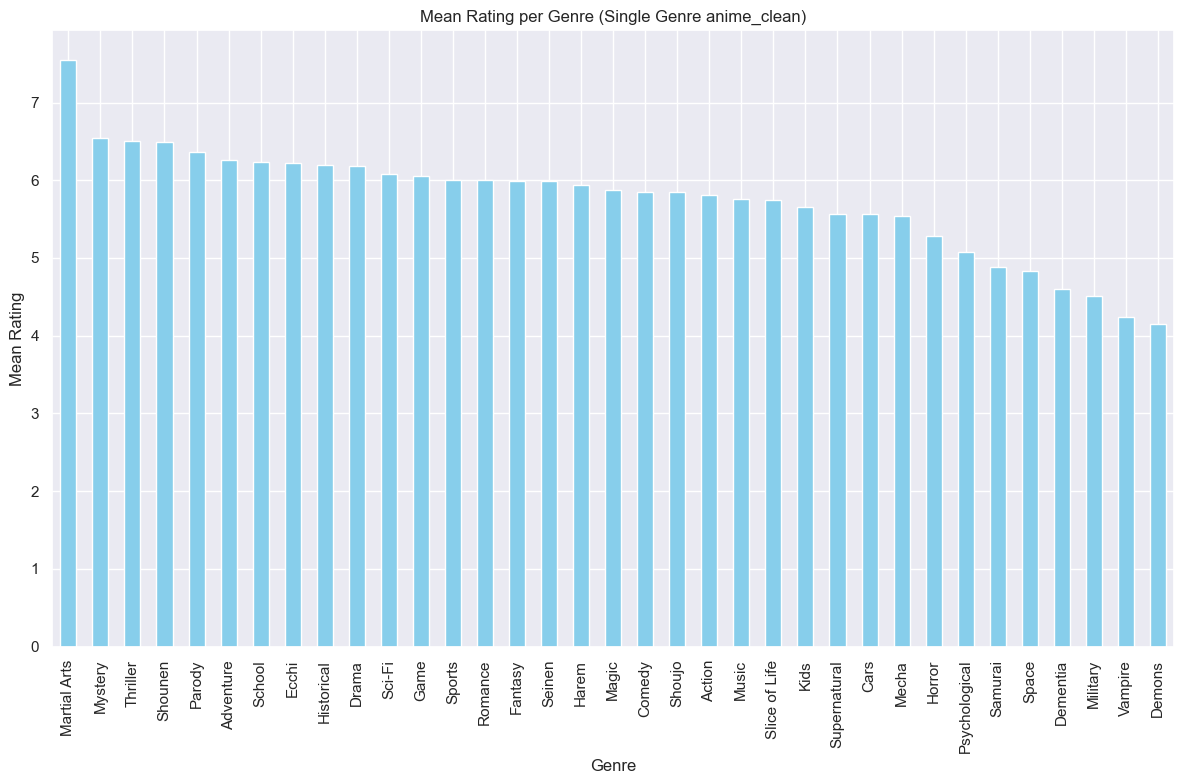

In [4]:
# Sort genres by mean rating
mean_rating_by_genre_sorted = mean_rating_by_genre.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
mean_rating_by_genre_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.title('Mean Rating per Genre (Single Genre anime_clean)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [5]:
# Check if "Police", "Super Power" and "Josei" exist in the genre column
police_exists = anime_clean['genre'].str.contains('Police', na=False).any()
josei_exists = anime_clean['genre'].str.contains('Josei', na=False).any()
sp_exists = anime_clean['genre'].str.contains('Super Power', na=False).any()
print("Does 'Police' exist in the dataset?", police_exists)
print("Does 'Josei' exist in the dataset?", josei_exists)
print("Does 'Super Power' exist in the dataset?", sp_exists)

Does 'Police' exist in the dataset? True
Does 'Josei' exist in the dataset? True
Does 'Super Power' exist in the dataset? True


In [6]:
# Drop rows with missing genre values
anime_clean.dropna(subset=['genre'], inplace=True)

# Filter out rows with only one genre
single_genre_index = ~anime_clean['genre'].str.contains(',', na=False)
single_genre_anime_clean = anime_clean.loc[single_genre_index]

# Split the single genre from each row
single_genre_anime_clean.loc[:, 'genre'] = single_genre_anime_clean['genre'].str.strip()
# Create a set of genres from anime_clean with only one genre
genres_single_genre_anime_clean = set(single_genre_anime_clean['genre'])

# Create a set of all genres found in the DataFrame
all_genres = set(sum(anime_clean['genre'].str.split(', ').tolist(), []))

# Find genres exclusive to multiple genre anime_clean
genres_only_in_multiple_anime_clean = all_genres - genres_single_genre_anime_clean

# Print the genres exclusive to multiple genre anime_clean, if any
if genres_only_in_multiple_anime_clean:
    print("Genres only present in multiple genre anime_clean:")
    for genre in genres_only_in_multiple_anime_clean:
        if genre not in ['Hentai', 'Yuri', 'Yaoi', 'Shounen Ai', 'Shoujo Ai']:
            print(genre)
else:
    print("There are no genres exclusive to multiple genre anime_clean.")

Genres only present in multiple genre anime_clean:
Police
Super Power
Josei


In [7]:
# Calculate the overall mean rating of all anime_clean
overall_mean_rating = anime_clean['rating'].mean()

# Define a function to replace the genre column with the combined average rating
def replace_genre_with_combined_avg(row):
    genres = row['genre'].split(', ')
    ratings = []
    for genre in genres:
        if genre in mean_rating_by_genre:
            ratings.append(mean_rating_by_genre[genre])
        else:
            ratings.append(overall_mean_rating)
    return sum(ratings) / len(ratings)

# Apply the function to each row in the DataFrame
anime_clean['genre'] = anime_clean.apply(replace_genre_with_combined_avg, axis=1)
anime_clean['genre'].describe()

count    10733.000000
mean         5.908857
std          0.271068
min          4.145000
25%          5.804456
50%          5.938845
75%          6.062596
max          7.550000
Name: genre, dtype: float64

In [8]:
# Calculate the average rating for each type of anime_clean
average_ratings_by_type = anime_clean.groupby('type')['rating'].mean().reset_index()

# Map average ratings to the 'type' column
anime_clean['type'] = anime_clean['type'].map(average_ratings_by_type.set_index('type')['rating'])

# Rename the 'type' column to 'average_rating'
#anime_clean = anime_clean.rename(columns={'type': 'average_rating_by_type'})

# Display the DataFrame
print(anime_clean['type'].unique())
anime_clean_linear_regression=anime_clean

[6.33406055 6.89924758 6.46496695 6.15491649]


In [9]:
anime_clean_linear_regression['rating'].describe()

count    10733.000000
mean         6.504288
std          1.048680
min          1.670000
25%          5.900000
50%          6.610000
75%          7.240000
max         10.000000
Name: rating, dtype: float64

Mean Squared Error (Training): 0.9339088959373364
R² (Training): 0.15202052370149954
Adjusted R² (Training): 0.15172409647837026
Mean Squared Error (Test): 0.9362509855596782
R² (Test): 0.14325189715503617
Adjusted R² (Test): 0.14205252976887894


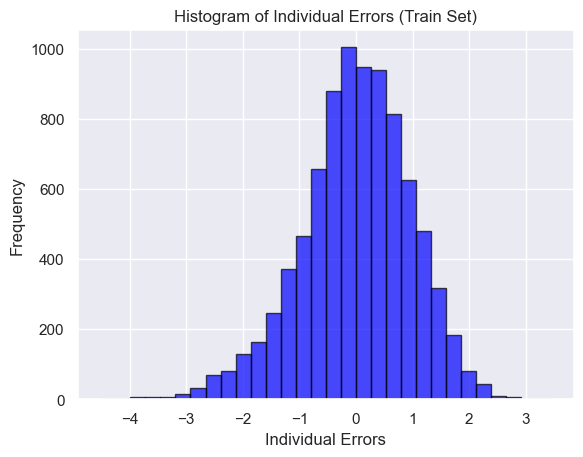

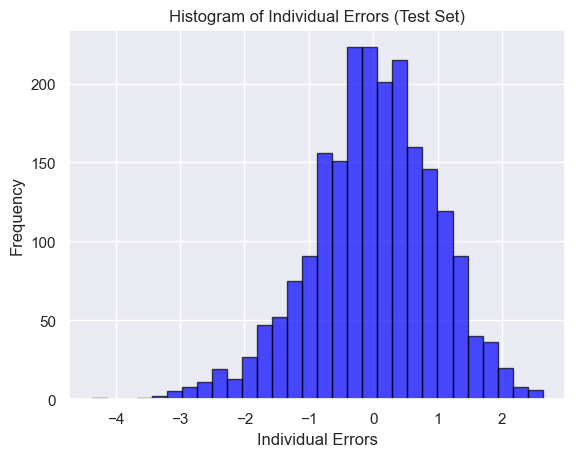


Linear Regression Coefficients:
   Variable  Coefficient
0     genre     1.027687
1      type     0.909417
2  episodes    -0.000089
Intercept: -5.482397230952373


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for regression
X = anime_clean_linear_regression[['genre', 'type', 'episodes']]
y = anime_clean_linear_regression['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate R² and adjusted R² for the training set
n_train = len(y_train)
p_train = X_train.shape[1]
r_squared_train = r2_score(y_train, y_train_pred)
adjusted_r_squared_train = 1 - (1 - r_squared_train) * (n_train - 1) / (n_train - p_train - 1)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate R² and adjusted R² for the test set
n_test = len(y_test)
p_test = X_test.shape[1]
r_squared_test = r2_score(y_test, y_test_pred)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (n_test - 1) / (n_test - p_test - 1)

# Evaluate the model
print("Mean Squared Error (Training):", mean_squared_error(y_train, y_train_pred))
print("R² (Training):", r_squared_train)
print("Adjusted R² (Training):", adjusted_r_squared_train)
print("Mean Squared Error (Test):", mean_squared_error(y_test, y_test_pred))
print("R² (Test):", r_squared_test)
print("Adjusted R² (Test):", adjusted_r_squared_test)

individual_errors = y_train - y_train_pred
individual_errors1 = y_test - y_test_pred
# Plot histogram of individual errors
plt.hist(individual_errors, bins=30, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Individual Errors')
plt.ylabel('Frequency')
plt.title('Histogram of Individual Errors (Train Set)')

# Show plot
plt.show()

# Plot histogram of individual errors
plt.hist(individual_errors1, bins=30, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Individual Errors')
plt.ylabel('Frequency')
plt.title('Histogram of Individual Errors (Test Set)')

# Show plot
plt.show()

# Create a DataFrame to store coefficients and variable names for Linear Regression model
linear_coefficients_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': model.coef_})
linear_coefficients_df = linear_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print coefficients and variable names for Linear Regression model
print("\nLinear Regression Coefficients:")
print(linear_coefficients_df)

# Get the intercept of the linear regression model
intercept = model.intercept_

# Print the intercept
print("Intercept:", intercept)

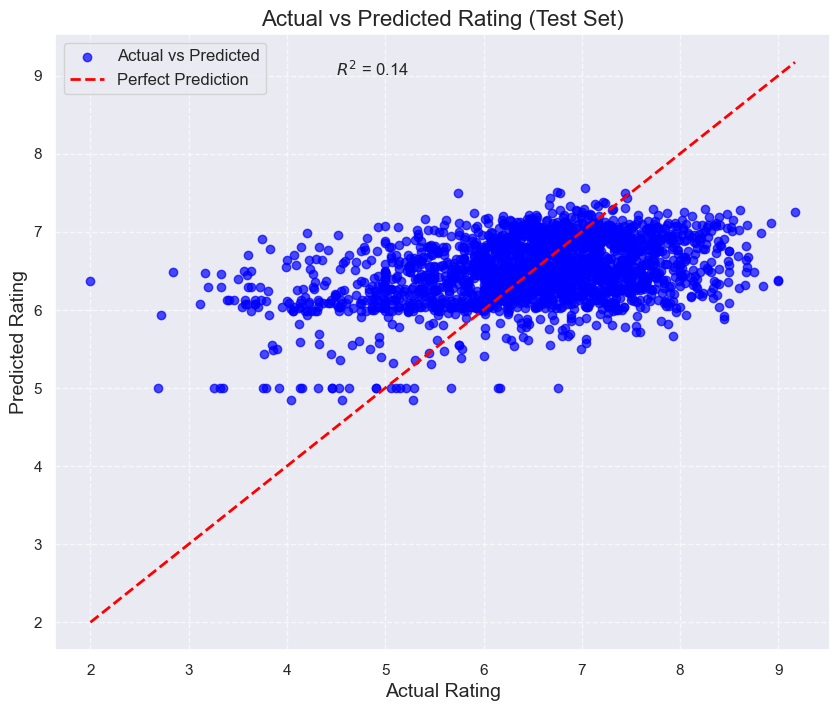

In [11]:
# Set plot size and style
plt.figure(figsize=(10, 8))
sb.set_style('darkgrid')

# Plot actual vs predicted values for the test set
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Rating', fontsize=14)
plt.ylabel('Predicted Rating', fontsize=14)
plt.title('Actual vs Predicted Rating (Test Set)', fontsize=16)

# Add legend
plt.legend(fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add text for R-squared
plt.text(4.5, 9, f'$R^2$ = {r_squared_test:.2f}', fontsize=12)

# Show plot
plt.show()